In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [56]:
# Print the shapes of the training and test sets

X_test.shape

(10000, 32, 32, 3)

In [59]:
y_train.shape

(50000, 1)

In [61]:
# Display the first 5 labels from the training set

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [63]:
# Reshape the labels from (n, 1) to (n,)

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [65]:
y_test = y_test.reshape(-1,)

In [67]:
# Define the class names for CIFAR-10

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [69]:
# Function to plot a sample image along with its label

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

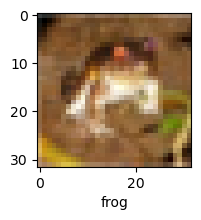

In [71]:
# Plot sample images from the training set

plot_sample(X_train, y_train, 0)

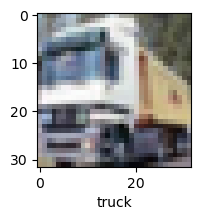

In [73]:
plot_sample(X_train, y_train, 1)

In [75]:
# Normalize the pixel values to be between 0 and 1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [76]:
# Define a simple Artificial Neural Network (ANN) model

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),          # Flatten the input
        layers.Dense(3000, activation='relu'),          # First hidden layer
        layers.Dense(1000, activation='relu'),          # Second hidden layer
        layers.Dense(10, activation='softmax')          # Output layer
    ])

# Compile the ANN model
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the ANN model
ann.fit(X_train, y_train, epochs=5)



C:\Users\prala\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3063 - loss: 1.9315
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4197 - loss: 1.6375
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4533 - loss: 1.5517
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4736 - loss: 1.4861
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4931 - loss: 1.4385


In [78]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# Predict the classes of the test set
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print the classification report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.45      0.50      1000
           1       0.52      0.69      0.59      1000
           2       0.43      0.21      0.29      1000
           3       0.33      0.29      0.31      1000
           4       0.55      0.28      0.37      1000
           5       0.39      0.38      0.39      1000
           6       0.42      0.70      0.53      1000
           7       0.66      0.44      0.53      1000
           8       0.42      0.80      0.55      1000
           9       0.55      0.42      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [79]:
# Define a Convolutional Neural Network (CNN) model

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\prala\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Compile the CNN model

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
# Train the CNN model

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3692 - loss: 1.7229
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5939 - loss: 1.1560
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6477 - loss: 1.0137
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6855 - loss: 0.9087
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7099 - loss: 0.8417
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7322 - loss: 0.7748
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7482 - loss: 0.7262
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7624 - loss: 0.6805
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7797 - loss: 0.6399
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7895 - loss: 0.5984


In [110]:
# Evaluate the CNN model on the test set

cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7101 - loss: 0.9026


[0.9225150346755981, 0.7032999992370605]

In [112]:
# Evaluate the ANN model on the test set

ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4753 - loss: 1.4776


[1.480277419090271, 0.4672999978065491]

In [114]:
# Predict the classes of the test set

y_pred = cnn.predict(X_test)

# Display the first 5 predictions
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.17971921e-04, 1.01666337e-04, 8.31548183e-04, 5.96109331e-01,
        9.64264691e-05, 5.24177589e-02, 2.59289086e-01, 1.59455303e-04,
        9.04402137e-02, 2.36504085e-04],
       [4.82409634e-02, 2.47687668e-01, 5.81082077e-06, 5.78781894e-08,
        2.13814322e-09, 1.88869897e-08, 1.24686164e-08, 3.30685097e-08,
        6.98382437e-01, 5.68298995e-03],
       [1.12069525e-01, 3.65858287e-01, 2.48518563e-03, 2.13758531e-03,
        5.20363625e-04, 1.10699097e-03, 1.27406252e-04, 2.72810739e-03,
        4.42955166e-01, 7.00113848e-02],
       [4.95437086e-01, 7.60329142e-02, 2.56187152e-02, 3.22504179e-03,
        9.57080978e-04, 2.02868305e-05, 6.86346248e-05, 2.16819299e-05,
        3.97643328e-01, 9.75310104e-04],
       [2.18846182e-07, 5.60748367e-06, 8.83836648e-04, 1.14211561e-02,
        9.26540554e-01, 5.93525940e-04, 6.05349056e-02, 1.54371846e-05,
        3.28357419e-06, 1.50735661e-06]], dtype=float32)

In [115]:
# Convert the predictions to class labels

y_classes = [np.argmax(element) for element in y_pred]



In [118]:
# Display the first 5 true labels

y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

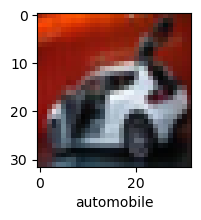

In [96]:
# Plot a sample image from the test set with its predicted label

plot_sample(X_test, y_test,6)

In [98]:

classes[y_classes[6]]

'automobile'

In [100]:

classes[y_classes[3]]

'airplane'

In [120]:
 from sklearn.metrics import classification_report

print("ANN Classification Report: \n", classification_report(y_test, y_pred_classes, target_names=classes))


ANN Classification Report: 
               precision    recall  f1-score   support

    airplane       0.56      0.45      0.50      1000
  automobile       0.52      0.69      0.59      1000
        bird       0.43      0.21      0.29      1000
         cat       0.33      0.29      0.31      1000
        deer       0.55      0.28      0.37      1000
         dog       0.39      0.38      0.39      1000
        frog       0.42      0.70      0.53      1000
       horse       0.66      0.44      0.53      1000
        ship       0.42      0.80      0.55      1000
       truck       0.55      0.42      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000



In [122]:
print("CNN Classification Report: \n", classification_report(y_test, y_classes, target_names=classes))


CNN Classification Report: 
               precision    recall  f1-score   support

    airplane       0.74      0.75      0.74      1000
  automobile       0.79      0.83      0.81      1000
        bird       0.63      0.56      0.59      1000
         cat       0.57      0.48      0.52      1000
        deer       0.59      0.73      0.65      1000
         dog       0.58      0.67      0.62      1000
        frog       0.78      0.77      0.78      1000
       horse       0.74      0.75      0.75      1000
        ship       0.88      0.71      0.79      1000
       truck       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

